In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

workdir = '/mnt/f/My Drive/PARPi binder paper/Figures/Fig_SPR/raw_data/'
prots = pd.read_csv(workdir + '20230510_599AVI_CONC.csv')

for i in range(len(prots.columns)):
    print(str(i) + ' ' + prots.columns[i])

0 Wavelength [nm]
1 599avi_2
2 599avi_4
3 599avi_6
4 599avi_8
5 599avi_10
6 599avi_12
7 599avi_14


In [6]:
def auto_zero(protdb):
    for name in protdb.columns[1:]:
        #print(protdb.columns)
        x = protdb[name][310:410]  - protdb[protdb.columns[0]][310:410]
        y = sum(x)/len(x)
        protdb[name] = protdb[name] - y
    return protdb


def get_conc(prot, bfactor):
    xs = [2/400, 4/402, 6/404, 8/406, 10/408, 12/410, 14/412]
    xs_re = np.array(xs).reshape(-1, 1)


    ys_280 = prot.iloc[280-190, :]
    reg_280 = LinearRegression().fit(xs_re, ys_280)
    print('R: {}'.format(reg_280.score(xs_re, ys_280)))
    print('intercept_: {}'.format(reg_280.intercept_))

    ys_280_corr = ys_280 - reg_280.intercept_
    prot_conc = ys_280_corr/bfactor*1000*1000

    factors = [400/2, 402/4, 404/6, 406/8, 408/10, 410/12, 14/412]
    prot_conc_stock = []

    for i in range(6):
        prot_conc_stock.append(prot_conc[i]*factors[i])

    print(prot_conc_stock)
    print('Protein concentration: {} uM.'.format(np.mean(prot_conc_stock)))


    fig,ax = plt.subplots()
    ax.scatter(xs_re, ys_280)
    ax.plot(xs_re, ys_280)
    plt.xlim([0, 0.04])
    plt.ylim([-0.05, 1.5])
    return prot_conc_stock, np.mean(prot_conc_stock[1:])

In [7]:

prot_90W = prots[prots.columns[1:8]]
print(prot_90W.columns)


#print(prot599_HBST.iloc[280-190, 1])
prot_90W = auto_zero(prot_90W)
#print(prot599_HBST.iloc[280-190, 1])


Index(['599avi_2', '599avi_4', '599avi_6', '599avi_8', '599avi_10',
       '599avi_12', '599avi_14'],
      dtype='object')


/tmp/ipykernel_859/252859864.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  protdb[name] = protdb[name] - y


R: 0.9999571320395949
intercept_: -0.00017412383260279052
[1003.3437813832281, 999.6838334296251, 986.7867185294626, 993.3929561751811, 992.5033376551864, 992.6385061900052]
994.7248555604482


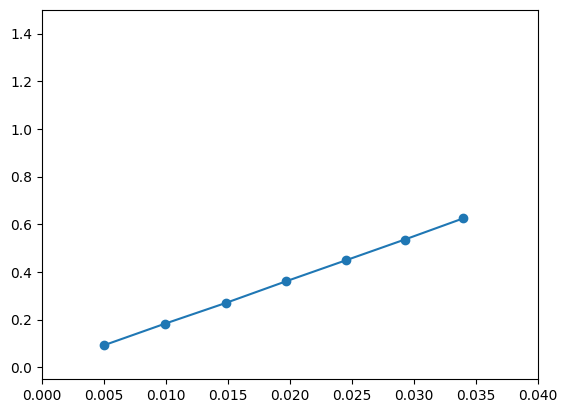

In [8]:

prot599_HBST_concs, prot599_HBST_conc = get_conc(prot_90W, bfactor=18450)
